In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
class SIR_model():
    def __init__(self, timesteps, pop_size, prop_init_infected, beta0, beta1, gamma):
        self.T = timesteps
        self.N = pop_size 
        self.p_I0  = prop_init_infected
        self.beta0 = beta0 # transmission rate 0
        self.beta1 = beta1 
        self.gamma = gamma # average rate of recovery (cases / timesteps)


    def simulate(self):
        S0 = np.zeros(self.T)
        I0 = np.zeros(self.T)
        R0 = np.zeros(self.T)
    
        S1 = np.zeros(self.T)
        I1 = np.zeros(self.T)
        R1 = np.zeros(self.T)
        
        # initialize S, I, and R
        I0[0] = int(self.p_I0 * self.N)
        S0[0] = self.N - I0[0]
        R0[0] = 0
        
        
        I1[0] = int(self.p_I0 * self.N)
        S1[0] = self.N - I1[0]
        R1[0] = 0
        
        for t in range(1, self.T):
            # update values of S, I, and R at each time interval t
            S0[t] = S0[t - 1] - int(((self.beta0 * S0[t - 1] * I0[t - 1]) / self.N))
            I0[t] = I0[t - 1] + int(((self.beta0 * S0[t - 1] * I0[t - 1]) / self.N) - self.gamma * I0[t - 1])
            R0[t] = R0[t - 1] + int(self.gamma * I0[t -1])
            
            S1[t] = S1[t - 1] - int(((self.beta1 * S1[t - 1] * I1[t - 1]) / self.N))
            I1[t] = I1[t - 1] + int(((self.beta1 * S1[t - 1] * I1[t - 1]) / self.N) - self.gamma * I1[t - 1])
            R1[t] = R1[t - 1] + int(self.gamma * I1[t -1])
        
        return S0, I0, R0, S1, I1, R1

In [9]:
sir = SIR_model(20, 100, 0.1, 0.6, 1, 0.6)
S0, I0, R0, S1, I1, R1  = sir.simulate()

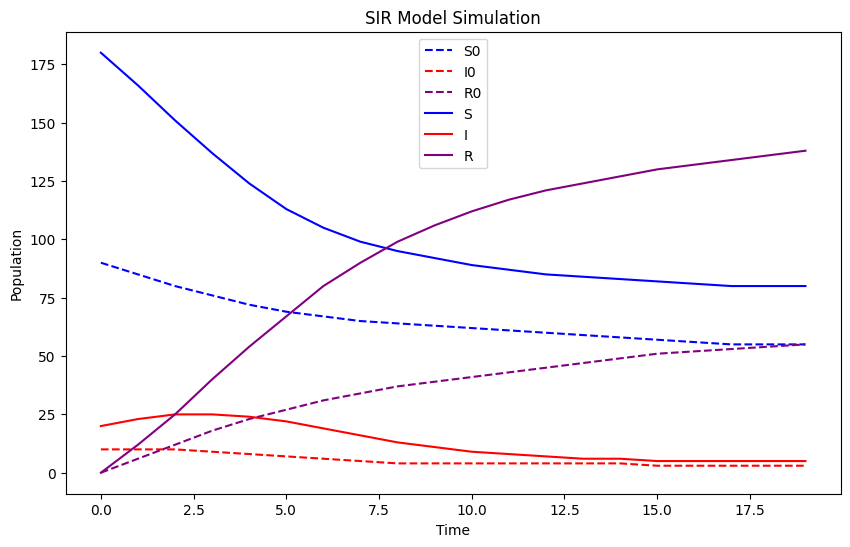

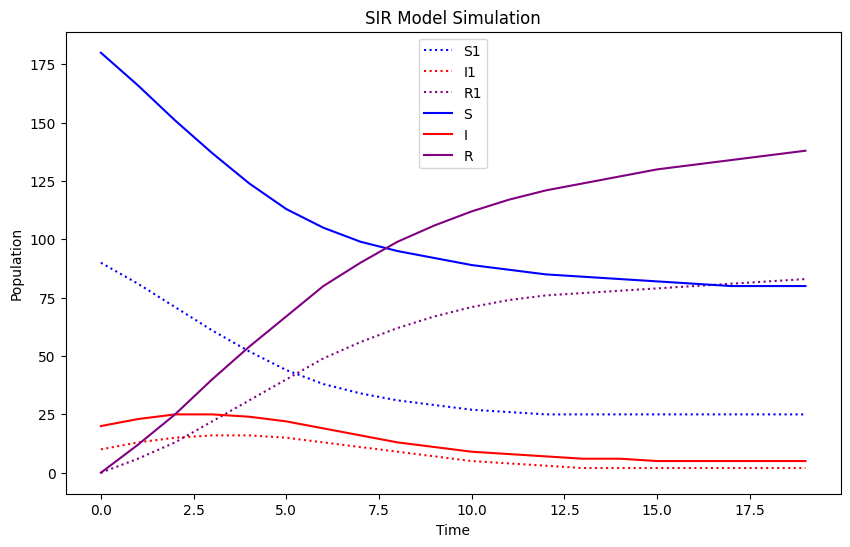

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(S0, label='S0', linestyle='--', color='blue')
plt.plot(I0, label='I0', linestyle='--', color='red')
plt.plot(R0, label='R0', linestyle='--', color='purple')
plt.plot(S1 + S0, label='S', color='blue')
plt.plot(I1 + I0, label='I', color='red')
plt.plot(R1 + R0, label='R', color='purple')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(S1, label='S1', linestyle=':', color='blue')
plt.plot(I1, label='I1', linestyle=':', color='red')
plt.plot(R1, label='R1', linestyle=':', color='purple')
plt.plot(S1 + S0, label='S', color='blue')
plt.plot(I1 + I0, label='I', color='red')
plt.plot(R1 + R0, label='R', color='purple')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()

What is $\beta$? A combination of how many people are contacted per day (contact rate) and how likely a sick person is to transmit the disease (force of infection)

In [11]:
# sir = SIR_model()
# https://jckantor.github.io/CBE30338/03.09-COVID-19.html
# infection period (1/gamma) is 8.4 days
# R_o is 2.4 (beta / gamma) or (recovery_time / time_between contacts)
# avg. number of people infected by a hypothetical case in a fully susceptible population
# think: 

In [12]:
"plt.plot(x, model.S / N, label=\"Susceptible\")\n",
"plt.plot(x, model.I/N, label=\"Infected\")\n",
"plt.ylim(0, 1.1)\n",
"plt.legend(loc=\"upper right\")\n",
"plt.show()"

'plt.show()'

In [13]:
# english boarding school flu epidemic
df = pd.read_csv("https://bit.ly/2vDqAYN", sep="\t")
# N = 763
# R_0 between 1 and 2
# infection period: ballpark 5-7 days

In [14]:
df

,day,cases
0,0,1
1,1,6
2,2,26
3,3,73
4,4,222
5,5,293
6,6,258
7,7,236
8,8,191
9,9,124


TypeError: SIR_model.__init__() missing 1 required positional argument: 'gamma'

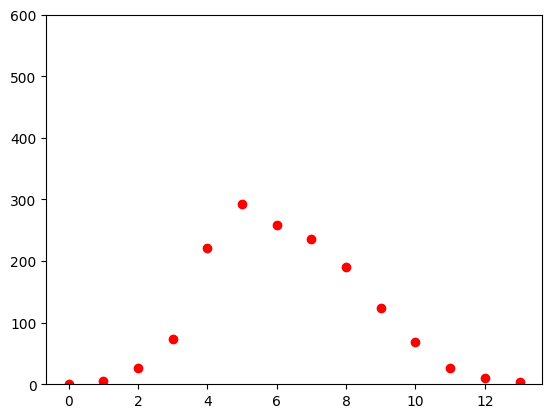

In [15]:
plt.scatter(df['day'], df['cases'], marker='o', color='red')
plt.ylim(0, 600)

sir1 = SIR_model(14, 763, 0.0015, 2.568966, 0.4810345)
S, I, R = sir1.simulate()

times = df['day'].values

plt.plot(times, I, color='blue')
plt.show()

Asymetric Contact Matrix

In [17]:
class SIR_model():
    def __init__(self, timesteps, 
                 pop_size_0, pop_size_1, 
                 prop_init_infected_0, prop_init_infected_1, 
                 beta_00, beta_01, beta_10, beta_11, 
                 gamma):
        
        self.T = timesteps
        self.N_0 = pop_size_0
        self.N_1 = pop_size_1
        self.p_I0_0 = prop_init_infected_0
        self.p_I0_1 = prop_init_infected_1 
        # transmission rates
        self.beta_00 = beta_00 # group 0 infecting group 0
        self.beta_01 = beta_01 # group 0 infecting group 1
        self.beta_10 = beta_10 # group 1 infecting group 0
        self.beta_11 = beta_11 # group 1 infecting group 1
        
        self.gamma = gamma # average recovery rate

    def simulate(self):
        S_0, I_0, R_0 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        S_1, I_1, R_1 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        
        # initialize populations
        I_0[0] = int(self.p_I0_0 * self.N_0)
        I_1[0] = int(self.p_I0_1 * self.N_1)
        S_0[0], S_1[0] = self.N_0 - I_0[0], self.N_1 - I_1[0]
        
        for t in range(1, self.T):
            # group 0 
            new_infections_0 = (self.beta_00 * I_0[t-1] * S_0[t-1] / self.N_0) + (self.beta_10 * I_1[t-1] * S_0[t-1] / self.N_0)
            S_0[t] = S_0[t-1] - new_infections_0
            I_0[t] = I_0[t-1] + new_infections_0 - self.gamma * I_0[t-1]
            R_0[t] = R_0[t-1] + self.gamma * I_0[t-1]
            
            # group 1
            new_infections_1 = (self.beta_11 * I_1[t-1] * S_1[t-1] / self.N_1) + (self.beta_01 * I_0[t-1] * S_1[t-1] / self.N_1)
            S_1[t] = S_1[t-1] - new_infections_1
            I_1[t] = I_1[t-1] + new_infections_1 - self.gamma * I_1[t-1]
            R_1[t] = R_1[t-1] + self.gamma * I_1[t-1]

        return S_0, I_0, R_0, S_1, I_1, R_1

In [18]:
N = 100000
p_I0_0 = 50.0 / N  # initial infected proportion for Group 0
p_I0_1 = 2.0 / N   
t_infective = 5.1 + 3.3  # avg infectious period
gamma = 1 / t_infective
R0 = 2.4
beta = R0 * gamma

pop_size_0 = N / 10 
pop_size_1 = N * (9 / 10)


# Case 1: Segregated Groups
sir_case1 = SIR_model(150, pop_size_0, pop_size_1, p_I0_0, p_I0_1, 1.25*beta, 0, 0, 0.75*beta, gamma)

# Case 2: Symmetric Interaction
sir_case2 = SIR_model(150, pop_size_0, pop_size_1, p_I0_0, p_I0_1, beta, 0.5*beta, 0.5*beta, beta, gamma)

# Case 3: Asymmetric Interaction
sir_case3 = SIR_model(150, pop_size_0, pop_size_1, p_I0_0, p_I0_1, beta, 0.2*beta, 0.8*beta, beta, gamma)

S0_case1, I0_case1, R0_case1, S1_case1, I1_case1, R1_case1 = sir_case1.simulate()
S0_case2, I0_case2, R0_case2, S1_case2, I1_case2, R1_case2 = sir_case2.simulate()
S0_case3, I0_case3, R0_case3, S1_case3, I1_case3, R1_case3 = sir_case3.simulate()

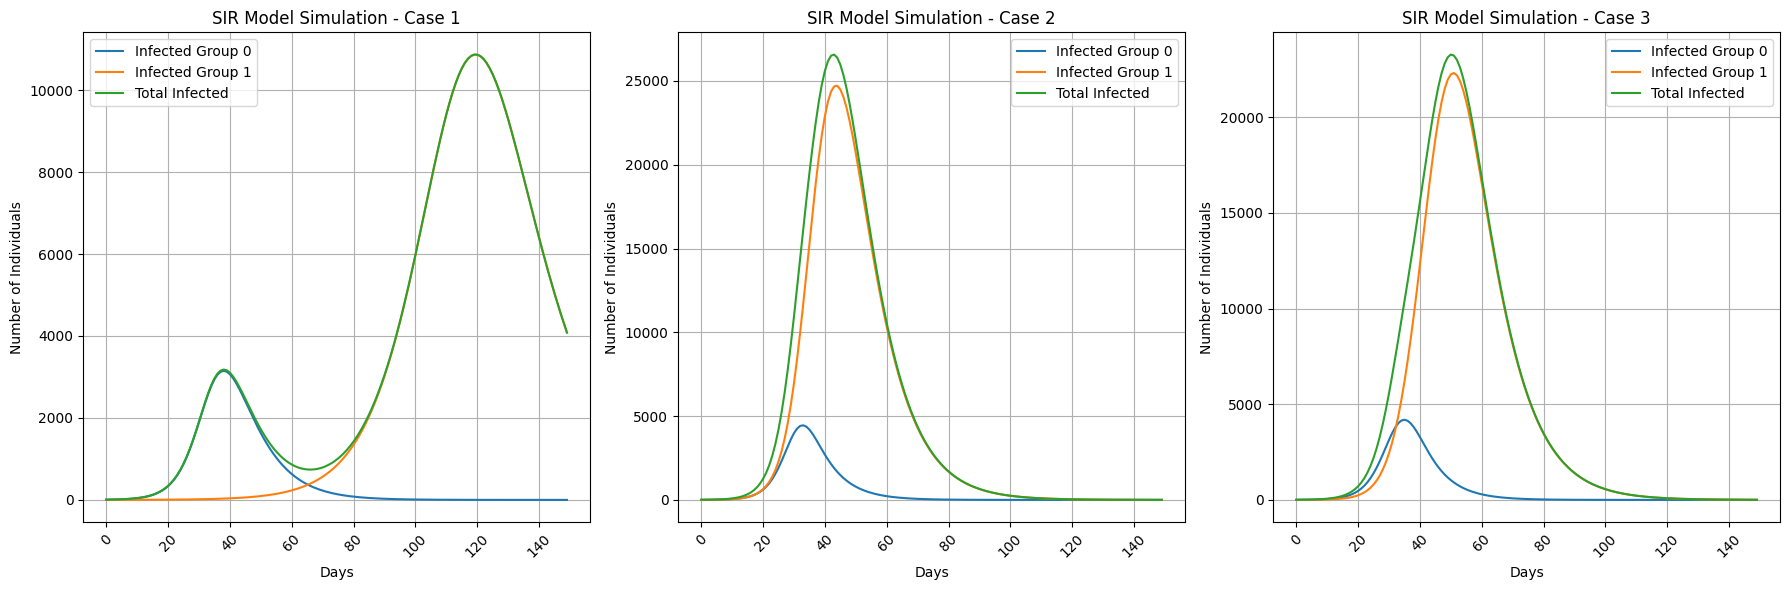

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Case 1
axes[0].grid(True)
axes[0].set_title("SIR Model Simulation - Case 1")
axes[0].plot(I0_case1, label='Infected Group 0')
axes[0].plot(I1_case1, label='Infected Group 1')
axes[0].plot(I0_case1 + I1_case1, label='Total Infected')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Number of Individuals')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot for Case 2
axes[1].grid(True)
axes[1].set_title("SIR Model Simulation - Case 2")
axes[1].plot(I0_case2, label='Infected Group 0')
axes[1].plot(I1_case2, label='Infected Group 1')
axes[1].plot(I0_case2 + I1_case2, label='Total Infected')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Number of Individuals')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Plot for Case 3
axes[2].grid(True)
axes[2].set_title("SIR Model Simulation - Case 3")
axes[2].plot(I0_case3, label='Infected Group 0')
axes[2].plot(I1_case3, label='Infected Group 1')
axes[2].plot(I0_case3 + I1_case3, label='Total Infected')
axes[2].set_xlabel('Days')
axes[2].set_ylabel('Number of Individuals')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

SEIR:

In [25]:
import numpy as np

class SEIR_model():
    def __init__(self, timesteps, 
                 pop_size_0, pop_size_1, 
                 prop_init_exposed_0, prop_init_exposed_1, 
                 beta_00, beta_01, beta_10, beta_11, 
                 sigma, gamma):
        
        self.T = timesteps
        self.N_0 = pop_size_0
        self.N_1 = pop_size_1
        self.p_E0_0 = prop_init_exposed_0
        self.p_E0_1 = prop_init_exposed_1 
        # transmission rates
        self.beta_00 = beta_00 # group 0 infecting group 0
        self.beta_01 = beta_01 # group 0 infecting group 1
        self.beta_10 = beta_10 # group 1 infecting group 0
        self.beta_11 = beta_11 # group 1 infecting group 1
        
        self.sigma = sigma # rate at which exposed individuals become infectious
        self.gamma = gamma # average recovery rate

    def simulate(self):
        S_0, E_0, I_0, R_0 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        S_1, E_1, I_1, R_1 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        
        # initialize populations
        E_0[0] = int(self.p_E0_0 * self.N_0)
        E_1[0] = int(self.p_E0_1 * self.N_1)
        S_0[0], S_1[0] = self.N_0 - E_0[0], self.N_1 - E_1[0]
        
        for t in range(1, self.T):
            # group 0 
            new_exposed_0 = (self.beta_00 * I_0[t-1] * S_0[t-1] / self.N_0) + (self.beta_10 * I_1[t-1] * S_0[t-1] / self.N_0)
            S_0[t] = S_0[t-1] - new_exposed_0
            E_0[t] = E_0[t-1] + new_exposed_0 - self.sigma * E_0[t-1]
            I_0[t] = I_0[t-1] + self.sigma * E_0[t-1] - self.gamma * I_0[t-1]
            R_0[t] = R_0[t-1] + self.gamma * I_0[t-1]
            
            # group 1
            new_exposed_1 = (self.beta_11 * I_1[t-1] * S_1[t-1] / self.N_1) + (self.beta_01 * I_0[t-1] * S_1[t-1] / self.N_1)
            S_1[t] = S_1[t-1] - new_exposed_1
            E_1[t] = E_1[t-1] + new_exposed_1 - self.sigma * E_1[t-1]
            I_1[t] = I_1[t-1] + self.sigma * E_1[t-1] - self.gamma * I_1[t-1]
            R_1[t] = R_1[t-1] + self.gamma * I_1[t-1]

        return S_0, E_0, I_0, R_0, S_1, E_1, I_1, R_1

In [68]:
# Example of parameters (to be adjusted as needed):
timesteps = 150
R0 = 4.0
t_infective = 18
gamma = 1/t_infective
beta = R0*gamma 
pop_size_0, pop_size_1 = 990, 10
prop_init_exposed_0, prop_init_exposed_1 = 0.00, 0.10
beta_00, beta_01, beta_10, beta_11 = 0.7* beta, 1.2* beta,  1.2* beta, 2*beta
sigma, gamma = 1/5.2, 1/18  # Typical incubation period and infectious period for COVID-19

# Create an instance of the SEIR model
model = SEIR_model(timesteps, pop_size_0, pop_size_1, prop_init_exposed_0, prop_init_exposed_1, beta_00, beta_01, beta_10, beta_11, sigma, gamma)

# Simulate the model
S0, E0, I0, R0, S1, E1, I1, R1 = model.simulate()

C:\Users\enzog\AppData\Local\Temp\ipykernel_14816\1775788102.py:35: RuntimeWarning: overflow encountered in scalar multiply
  new_exposed_0 = (self.beta_00 * I_0[t-1] * S_0[t-1] / self.N_0) + (self.beta_10 * I_1[t-1] * S_0[t-1] / self.N_0)
C:\Users\enzog\AppData\Local\Temp\ipykernel_14816\1775788102.py:35: RuntimeWarning: invalid value encountered in scalar add
  new_exposed_0 = (self.beta_00 * I_0[t-1] * S_0[t-1] / self.N_0) + (self.beta_10 * I_1[t-1] * S_0[t-1] / self.N_0)
C:\Users\enzog\AppData\Local\Temp\ipykernel_14816\1775788102.py:42: RuntimeWarning: overflow encountered in scalar multiply
  new_exposed_1 = (self.beta_11 * I_1[t-1] * S_1[t-1] / self.N_1) + (self.beta_01 * I_0[t-1] * S_1[t-1] / self.N_1)
C:\Users\enzog\AppData\Local\Temp\ipykernel_14816\1775788102.py:42: RuntimeWarning: invalid value encountered in scalar add
  new_exposed_1 = (self.beta_11 * I_1[t-1] * S_1[t-1] / self.N_1) + (self.beta_01 * I_0[t-1] * S_1[t-1] / self.N_1)


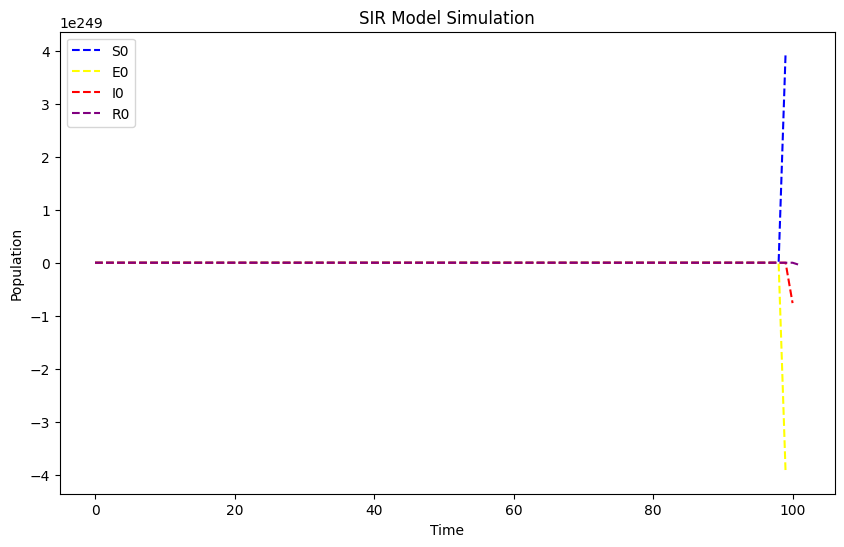

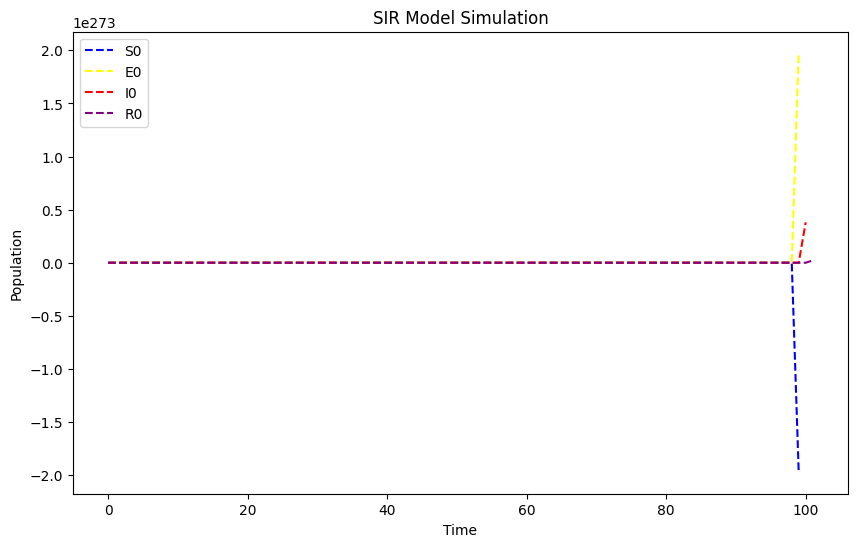

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(S0, label='S0', linestyle='--', color='blue')
plt.plot(E0, label='E0', linestyle='--', color='yellow')
plt.plot(I0, label='I0', linestyle='--', color='red')
plt.plot(R0, label='R0', linestyle='--', color='purple')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(S1, label='S0', linestyle='--', color='blue')
plt.plot(E1, label='E0', linestyle='--', color='yellow')
plt.plot(I1, label='I0', linestyle='--', color='red')
plt.plot(R1, label='R0', linestyle='--', color='purple')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()